In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import qp
import individual_metrics as inmet
import skgof
%matplotlib inline

# Test 10% of Ibrahim's data with no cuts

In [2]:
infile = "/Users/samschmidt/PZPAPER/mystuff/IBRAHIM/everytenth_PDF.out"
szfile = "/Users/samschmidt/PZPAPER/mystuff/IBRAHIM/everytenth_idszimag.out"
z_array = np.arange(0.0,2.0050,0.0100) #this is the grid that Ibrahim uses
print z_array
tmpdata = np.loadtxt(szfile)
z_trues = tmpdata[:,1]
mags = tmpdata[:,2]
alldata = np.loadtxt(infile)
ID = alldata[:,0]
pzs = alldata[:,1:]
ngals = len(ID)
print len(z_array)
print pzs.shape


[ 0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11
  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21  0.22  0.23
  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33  0.34  0.35
  0.36  0.37  0.38  0.39  0.4   0.41  0.42  0.43  0.44  0.45  0.46  0.47
  0.48  0.49  0.5   0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59
  0.6   0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69  0.7   0.71
  0.72  0.73  0.74  0.75  0.76  0.77  0.78  0.79  0.8   0.81  0.82  0.83
  0.84  0.85  0.86  0.87  0.88  0.89  0.9   0.91  0.92  0.93  0.94  0.95
  0.96  0.97  0.98  0.99  1.    1.01  1.02  1.03  1.04  1.05  1.06  1.07
  1.08  1.09  1.1   1.11  1.12  1.13  1.14  1.15  1.16  1.17  1.18  1.19
  1.2   1.21  1.22  1.23  1.24  1.25  1.26  1.27  1.28  1.29  1.3   1.31
  1.32  1.33  1.34  1.35  1.36  1.37  1.38  1.39  1.4   1.41  1.42  1.43
  1.44  1.45  1.46  1.47  1.48  1.49  1.5   1.51  1.52  1.53  1.54  1.55
  1.56  1.57  1.58  1.59  1.6   1.61  1.62  1.63  1

In [3]:
bpz_approx_pdf = qp.Ensemble(pzs.shape[0],gridded=(z_array,pzs))

made the pool of 4 in 0.117579936981
made the catalog in 196.277551174


In [4]:
nzobj = inmet.NzSumEvaluateMetric(bpz_approx_pdf,z_trues,eval_grid=z_array,using='gridded',dx=0.0001)

In [5]:
ks_stat,ks_pval = nzobj.NZKS()
print ks_stat
print ks_pval

0.0299491110871
1.99351255844e-78


In [6]:
cvm_stat,cvm_pval = nzobj.NZCVM()
print cvm_stat
print cvm_pval

6.37474086739
5.10702591328e-15


In [7]:
zmin = min(z_trues)
zmax = max(z_trues)
print zmin,zmax

0.0147 2.0


In [8]:
ad_stat,ad_pval = nzobj.NZAD(vmin = 0.005, vmax=2.11, delv=0.01)
print ad_stat
print ad_pval

using 0.005000 and 2.110000 for vmin and vmax

136.105226034
5.99466476459e-09


In [9]:
ad_stat,ad_pval = nzobj.NZAD(vmin = zmin, vmax=zmax, delv=0.01)
print ad_stat
print ad_pval

using 0.014700 and 2.000000 for vmin and vmax

130.757077239
5.99718130712e-09


In [10]:
ad_stat,ad_pval = nzobj.NZAD(vmin = 0.3, vmax=1.7, delv=0.01)
print ad_stat
print ad_pval

using 0.300000 and 1.700000 for vmin and vmax

43.5207862907
6.70391064883e-09


# Test KL Divergence with samples of z_trues

Created a KDE interpolator for the samples parametrization.
interpolating between 0.0147 and 2.0 using samples
Plotted samples


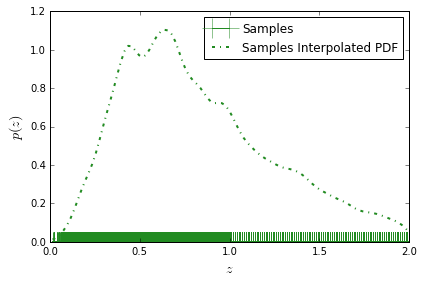

In [11]:
szsamplepdf = qp.PDF(samples=z_trues)
szsamplepdf.plot()

In [12]:
kldtest = qp.utils.calculate_kl_divergence(szsamplepdf,nzobj.stackpz,limits=(0.005,2.11),dx=0.001,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between 0.005 and 2.109 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.005 and 2.109 using gridded
almost normalized integrals
0.0671726589388


In [13]:
kldtest = qp.utils.calculate_kl_divergence(szsamplepdf,nzobj.stackpz,limits=(-0.200,2.31),dx=0.001,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between -0.2 and 2.309 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between -0.2 and 2.309 using gridded
almost normalized integrals
0.0733535089925


In [14]:
kldtest = qp.utils.calculate_kl_divergence(szsamplepdf,nzobj.stackpz,limits=(zmin,zmax),dx=0.001,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between 0.0147 and 1.9997 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.0147 and 1.9997 using gridded
almost normalized integrals
0.0177889451995


In [15]:
kldtest = qp.utils.calculate_kl_divergence(szsamplepdf,nzobj.stackpz,limits=(0.3,1.7),dx=0.001,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between 0.3 and 1.699 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.3 and 1.699 using gridded
almost normalized integrals
0.010433810257


In [16]:
kldtest = qp.utils.calculate_kl_divergence(szsamplepdf,nzobj.stackpz,limits=(-1.3,3.7),dx=0.001,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between -1.3 and 3.699 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between -1.3 and 3.699 using gridded
almost normalized integrals
0.0719760964141


In [17]:
plotarray = np.arange(0.0,2.2,0.005)
pzsumvec = nzobj.stackpz.evaluate(plotarray,'gridded',False,False)
sztruevec = szsamplepdf.evaluate(plotarray,'samples',False,False)

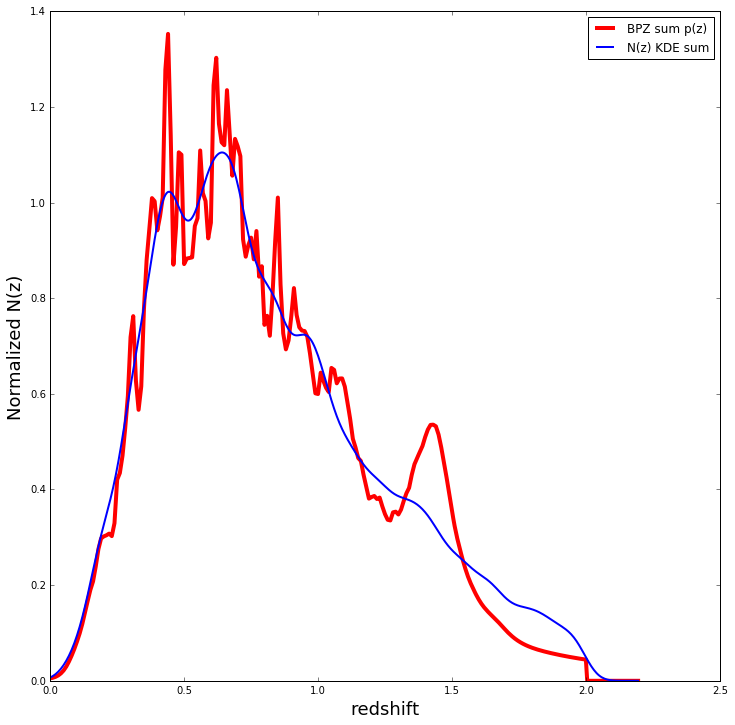

In [18]:
fig = plt.figure(figsize=(12,12))
plt.plot(pzsumvec[0],pzsumvec[1],lw=4,c='r',label='BPZ sum p(z)')
plt.plot(sztruevec[0],sztruevec[1],lw=2,c='b',label='N(z) KDE sum')
plt.xlabel('redshift',size=18)
plt.ylabel('Normalized N(z)',size=18)
plt.legend()

In [19]:
pzcdf = np.cumsum(pzsumvec[1])*0.005
szcdf = np.cumsum(sztruevec[1])*0.005

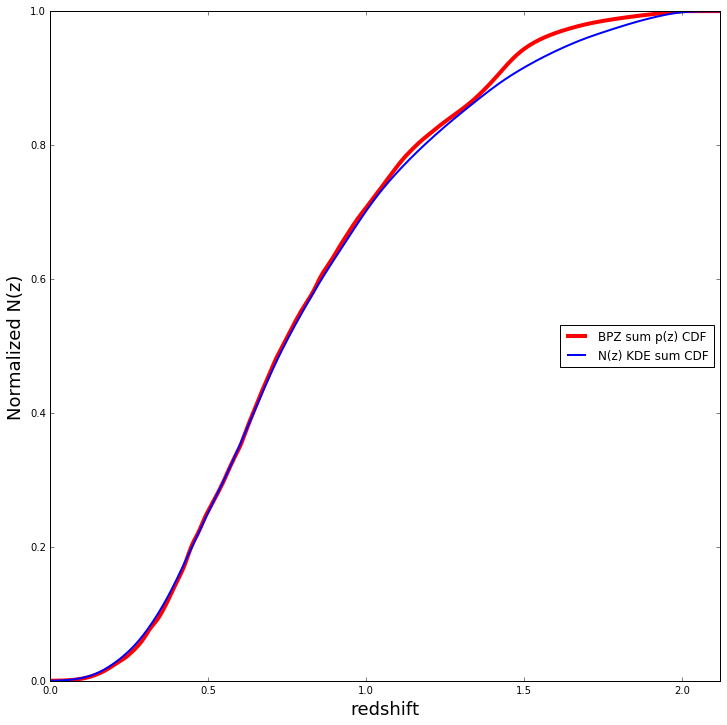

In [20]:
fig = plt.figure(figsize=(12,12))
plt.plot(pzsumvec[0],pzcdf,lw=4,c='r',label='BPZ sum p(z) CDF')
plt.plot(sztruevec[0],szcdf,lw=2,c='b',label='N(z) KDE sum CDF')
plt.xlabel('redshift',size=18)
plt.ylabel('Normalized N(z)',size=18)
plt.xlim([0,2.12])
plt.ylim([0.0,1.0])
plt.legend(loc=5)

# Data with i<25.3 cut

In [21]:
magcut = (mags<25.3)
goldzs = z_trues[magcut]
goldpzs = pzs[magcut]
goldnumgals = len(goldzs)
print goldnumgals
print goldpzs.shape

39892
(39892, 201)


In [22]:
gold_pdf = qp.Ensemble(goldpzs.shape[0],gridded=(z_array,goldpzs))

made the pool of 4 in 0.0327229499817
made the catalog in 71.9017179012


In [23]:
nzgoldobj = inmet.NzSumEvaluateMetric(gold_pdf,goldzs,eval_grid=z_array,using='gridded',dx=0.0001)

In [24]:
ks_stat,ks_pval = nzgoldobj.NZKS()
print ks_stat
print ks_pval

0.0132751349718
1.55125402158e-06


In [25]:
cvm_stat,cvm_pval = nzgoldobj.NZCVM()
print cvm_stat
print cvm_pval

0.658485806054
0.016075158247


In [26]:
goldzmin = min(goldzs)
goldzmax = max(goldzs)
print goldzmin,goldzmax

0.0147 2.0


In [27]:
ad_stat,ad_pval = nzgoldobj.NZAD(vmin = 0.005, vmax=2.11, delv=0.01)
print ad_stat
print ad_pval

using 0.005000 and 2.110000 for vmin and vmax

16.0379169016
1.50406096466e-08


In [28]:
ad_stat,ad_pval = nzgoldobj.NZAD(vmin = goldzmin, vmax=goldzmax, delv=0.01)
print ad_stat
print ad_pval

using 0.014700 and 2.000000 for vmin and vmax

15.834863763
1.50421178846e-08


In [29]:
ad_stat,ad_pval = nzgoldobj.NZAD(vmin = -.5, vmax=2.5, delv=0.01)
print ad_stat
print ad_pval

using -0.500000 and 2.500000 for vmin and vmax

15.9824070518
1.50406096466e-08


In [30]:
ad_stat,ad_pval = nzgoldobj.NZAD(vmin = .03, vmax=1.95, delv=0.01)
print ad_stat
print ad_pval

using 0.030000 and 1.950000 for vmin and vmax

13.5645126853
1.50690342426e-08


In [31]:
ad_stat,ad_pval = nzgoldobj.NZAD(vmin = .05, vmax=1.95, delv=0.01)
print ad_stat
print ad_pval

using 0.050000 and 1.950000 for vmin and vmax

13.7120135478
1.5074840265e-08


In [32]:
ad_stat,ad_pval = nzgoldobj.NZAD(vmin = .04, vmax=1.96, delv=0.01)
print ad_stat
print ad_pval

using 0.040000 and 1.960000 for vmin and vmax

14.7122965632
1.5061753178e-08


In [33]:
szsamplepdfgold = qp.PDF(samples=goldzs)

Created a KDE interpolator for the samples parametrization.
interpolating between 0.0147 and 2.0 using samples
Plotted samples


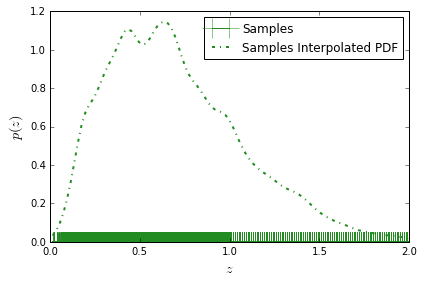

In [34]:
szsamplepdfgold.plot()

In [35]:
kldtest = qp.utils.calculate_kl_divergence(szsamplepdfgold,nzgoldobj.stackpz,limits=(0.005,2.11),dx=0.001,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between 0.005 and 2.109 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.005 and 2.109 using gridded
almost normalized integrals
0.0249818035875


In [36]:
kldtest = qp.utils.calculate_kl_divergence(szsamplepdfgold,nzgoldobj.stackpz,limits=(-1.3,3.7),dx=0.001,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between -1.3 and 3.699 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between -1.3 and 3.699 using gridded
almost normalized integrals
0.0397288300506


In [37]:
kldtest = qp.utils.calculate_kl_divergence(szsamplepdfgold,nzgoldobj.stackpz,limits=(goldzmin,goldzmax),dx=0.001,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between 0.0147 and 1.9997 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.0147 and 1.9997 using gridded
almost normalized integrals
0.0118063246572


In [38]:
kldtest = qp.utils.calculate_kl_divergence(szsamplepdfgold,nzgoldobj.stackpz,limits=(0.017,1.99),dx=0.001,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between 0.017 and 1.989 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.017 and 1.989 using gridded
almost normalized integrals
0.0117832001344


In [39]:
kldtest = qp.utils.calculate_kl_divergence(szsamplepdfgold,nzgoldobj.stackpz,limits=(0.015,2.01),dx=0.001,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between 0.015 and 2.009 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.015 and 2.009 using gridded
almost normalized integrals
0.0155031738934


In [40]:
kldtest = qp.utils.calculate_kl_divergence(szsamplepdfgold,nzgoldobj.stackpz,limits=(0.0,2.11),dx=0.001,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between 0.0 and 2.109 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.0 and 2.109 using gridded
almost normalized integrals
0.0249958265521


In [41]:
kldtest = qp.utils.calculate_kl_divergence(szsamplepdfgold,nzgoldobj.stackpz,limits=(-0.10,2.21),dx=0.001,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between -0.1 and 2.209 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between -0.1 and 2.209 using gridded
almost normalized integrals
0.0394792393859


In [42]:
kldtest = qp.utils.calculate_kl_divergence(szsamplepdfgold,nzgoldobj.stackpz,limits=(-1.10,3.21),dx=0.001,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between -1.1 and 3.209 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between -1.1 and 3.209 using gridded
almost normalized integrals
0.0397288300506


In [43]:
goldpzsumvec = nzgoldobj.stackpz.evaluate(plotarray,'gridded',False,False)
goldsztruevec = szsamplepdfgold.evaluate(plotarray,'samples',False,False)

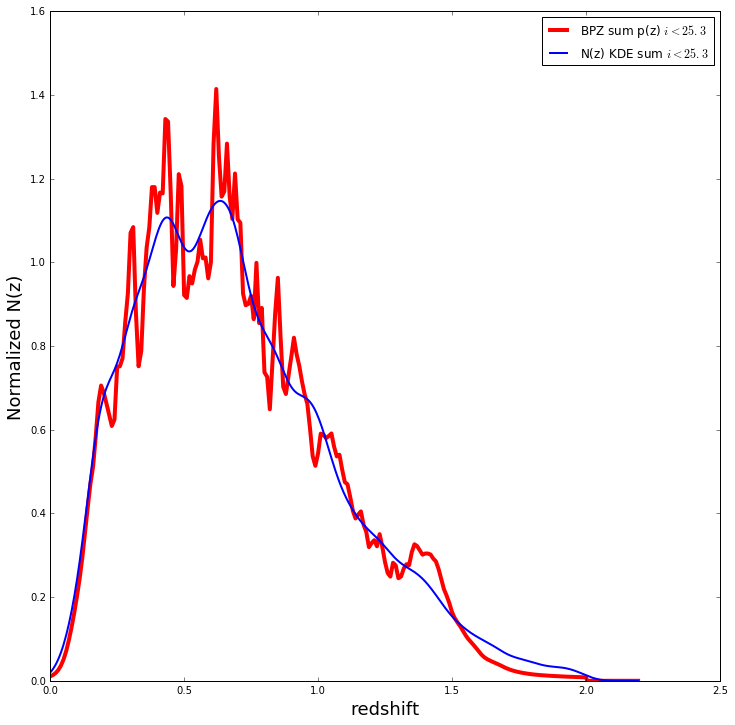

In [44]:
fig = plt.figure(figsize=(12,12))
plt.plot(goldpzsumvec[0],goldpzsumvec[1],lw=4,c='r',label='BPZ sum p(z) $i<25.3$')
plt.plot(goldsztruevec[0],goldsztruevec[1],lw=2,c='b',label='N(z) KDE sum $i<25.3$')
plt.xlabel('redshift',size=18)
plt.ylabel('Normalized N(z)',size=18)
plt.legend()

plot it in CDF form

In [45]:
pzgoldcdf = np.cumsum(goldpzsumvec[1])*0.005
szgoldcdf = np.cumsum(goldsztruevec[1])*0.005

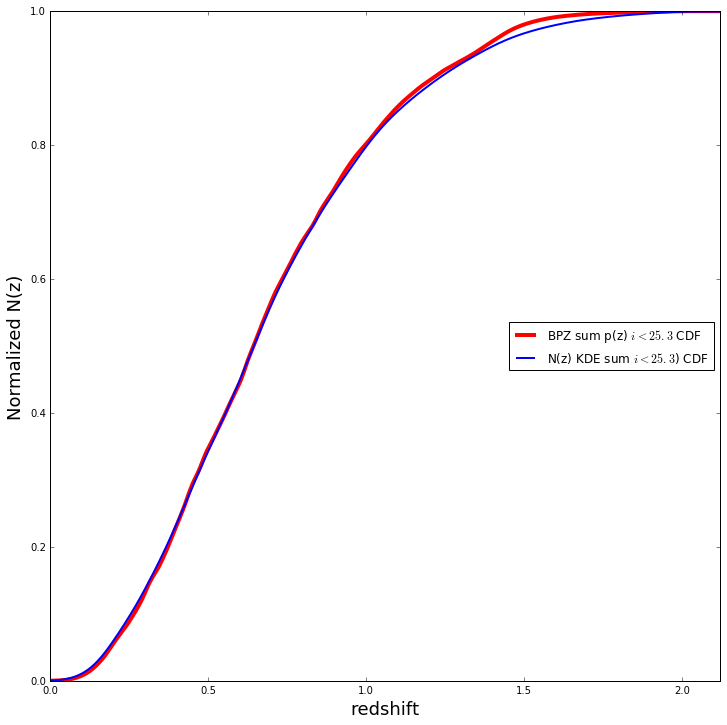

In [46]:
fig = plt.figure(figsize=(12,12))
plt.plot(goldpzsumvec[0],pzgoldcdf,lw=4,c='r',label='BPZ sum p(z) $i<25.3$ CDF')
plt.plot(goldsztruevec[0],szgoldcdf,lw=2,c='b',label='N(z) KDE sum $i<25.3$) CDF')
plt.xlabel('redshift',size=18)
plt.ylabel('Normalized N(z)',size=18)
plt.xlim([0,2.12])
plt.ylim([0.0,1.0])
plt.legend(loc=5)

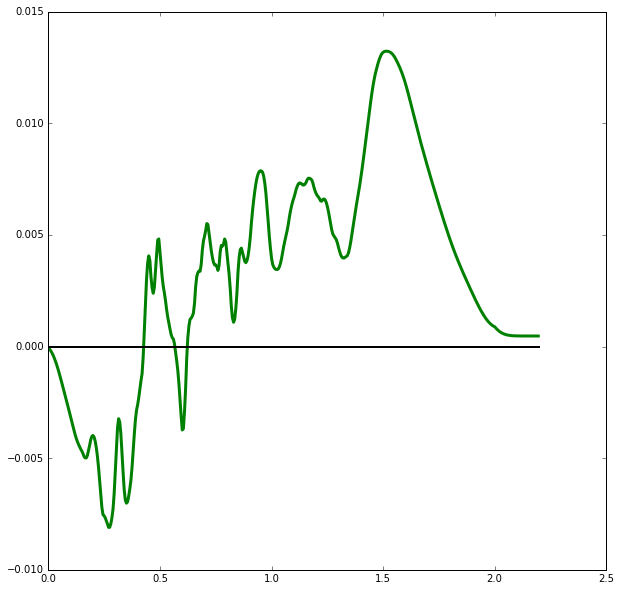

In [47]:
tmpdif = pzgoldcdf-szgoldcdf
figgy = plt.figure(figsize=(10,10))
plt.plot(plotarray,tmpdif,lw=3,c='g')
plt.plot([0,2.2],[0,0],lw=2,c='k')